### Linear regression

In [1]:
# https://drive.google.com/file/d/1K8g3i2ARLDueA9s_7LYC2C8aTmiEeq2b/view?usp=share_link

In [2]:
system("gdown --id 1K8g3i2ARLDueA9s_7LYC2C8aTmiEeq2b")

In [3]:
df = read.csv("marketing.csv")

In [4]:
head(df)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


In [5]:
tail(df)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
195,179.64,42.72,7.20,20.76
196,45.84,4.44,16.56,9.12
197,113.04,5.88,9.72,11.64
198,212.40,11.16,7.68,15.36
199,340.32,50.40,79.44,30.60
200,278.52,10.32,10.44,16.08


In [6]:
summary(df)

    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

In [7]:
str(df)

'data.frame':	200 obs. of  4 variables:
 $ youtube  : num  276.1 53.4 20.6 181.8 217 ...
 $ facebook : num  45.4 47.2 55.1 49.6 13 ...
 $ newspaper: num  83 54.1 83.2 70.2 70.1 ...
 $ sales    : num  26.5 12.5 11.2 22.2 15.5 ...


In [8]:
dim(df)

[1] 200   4

In [9]:
library("ggplot2")

In [10]:
plot = ggplot(data = df, aes(x= sales, y= youtube))+
  geom_point()+
  geom_smooth(method="lm")+
  theme_bw(base_size=14)

`geom_smooth()` using formula = 'y ~ x'


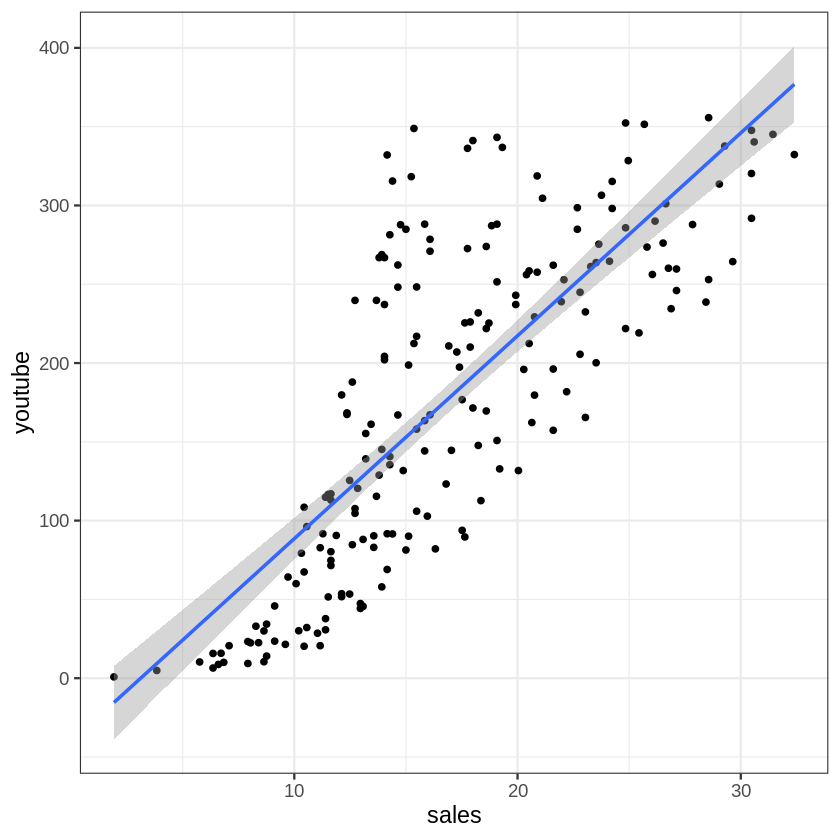

In [11]:
plot

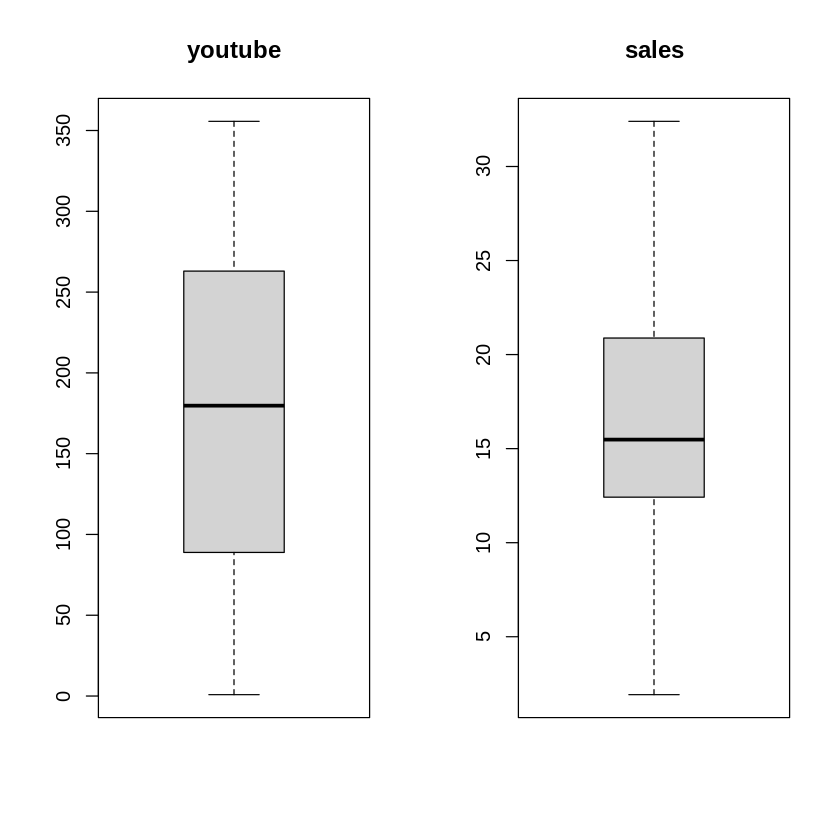

In [12]:
# check outliers
par(mfrow = c(1,2)) # divide graph into 2 columns
boxplot(df$youtube, main = "youtube")
boxplot(df$sales, main= "sales")

In [13]:
boxplot.stats(df$youtube)

$stats
[1]   0.84  88.86 179.70 262.98 355.68

$n
[1] 200

$conf
[1] 160.2468 199.1532

$out
numeric(0)

In [14]:
boxplot.stats(df$sales)

$stats
[1]  1.92 12.42 15.48 20.88 32.40

$n
[1] 200

$conf
[1] 14.53482 16.42518

$out
numeric(0)

In [15]:
# khong co outliers

In [16]:
print(cor(df$youtube, df$sales))

[1] 0.7822244


In [17]:
# Create the training (development) and test (validation) data samples from original data.
set.seed(13) 
# setting seed to reproduce results of random sampling 
trainingRowIndex <- sample (1: nrow(df), 0.7*nrow(df)) # row indices for training data
print("Selected training row indexes: ") 
print(trainingRowIndex)
trainingData <- df[trainingRowIndex, ] # training data 
testData <- df[-trainingRowIndex, ] # test data 
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))

[1] "Selected training row indexes: "
  [1]   3 192 101  74   6 176 150 132  64  81 128 106 143  55  23   5 140  49
 [19]  54  32 181 125  47 191 183  11  68 120  87  78  61 117 131 168 174  66
 [37] 129  62  51 127 115 118  60 195  76  42 163 119  15 113  14 121  31 146
 [55] 179 171 158  77 164 105  97  48 124 178 136 141  84  17  53   7  73  91
 [73] 182 142  90  46   9  36 200 198 185  57 159  67 184  70 157   8 144 154
 [91] 155   1 147  40  20  72  28  25  59 153  58  99  94  26  13  37  86 188
[109] 165 193 148 111 180 130  89 187  92  22 137  21  52   2 138  35  39  82
[127] 170 135 189  16 108  95  85  45  93 196 173 199 112 100
[1] "Rows of training data and test data:"
[1] 140
[1] 60


In [21]:
lmMod <- lm(sales ~ youtube, data=trainingData) # build model
iPred <- predict (lmMod, testData) # predict length
# mean square error according to model
mse <- mean(lmMod$residuals^2) 
print(paste("mse: ", mse))
# mean square error of testData
mse_test = mean((testData$sales - iPred)^2) 
print(paste("mse in test: ", mse_test))

[1] "mse:  16.3319194105834"
[1] "mse in test:  12.425496352185"


In [22]:
print(summary(lmMod))


Call:
lm(formula = sales ~ youtube, data = trainingData)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3254  -2.4074  -0.0771   2.6195   8.4405 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.364854   0.677961   12.34   <2e-16 ***
youtube     0.048550   0.003364   14.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.07 on 138 degrees of freedom
Multiple R-squared:  0.6014,	Adjusted R-squared:  0.5985 
F-statistic: 208.2 on 1 and 138 DF,  p-value: < 2.2e-16



In [23]:
# model coefficients 
print(coef(lmMod))
# get beta estimate for height 
beta_width <- coef(lmMod)["youtube"] 
print(paste("slope: ",beta_width)) 
Intercept <- coef(lmMod)["(Intercept)"] 
print(paste("Intercept: ", Intercept))

(Intercept)     youtube 
 8.36485370  0.04854994 
[1] "slope:  0.0485499395901091"
[1] "Intercept:  8.36485370360028"


In [24]:
# new prediction
# solution 1
x = c(100, 200, 300)
y = Intercept+ beta_width*x
print("Solution 1 - result: ")
print(y)

[1] "Solution 1 - result: "
[1] 13.21985 18.07484 22.92984


In [25]:
# solution 2
y1 = predict(lmMod, data.frame(youtube = x))
print("Solution 2 - result: ")
print(y1)

[1] "Solution 2 - result: "
       1        2        3 
13.21985 18.07484 22.92984 


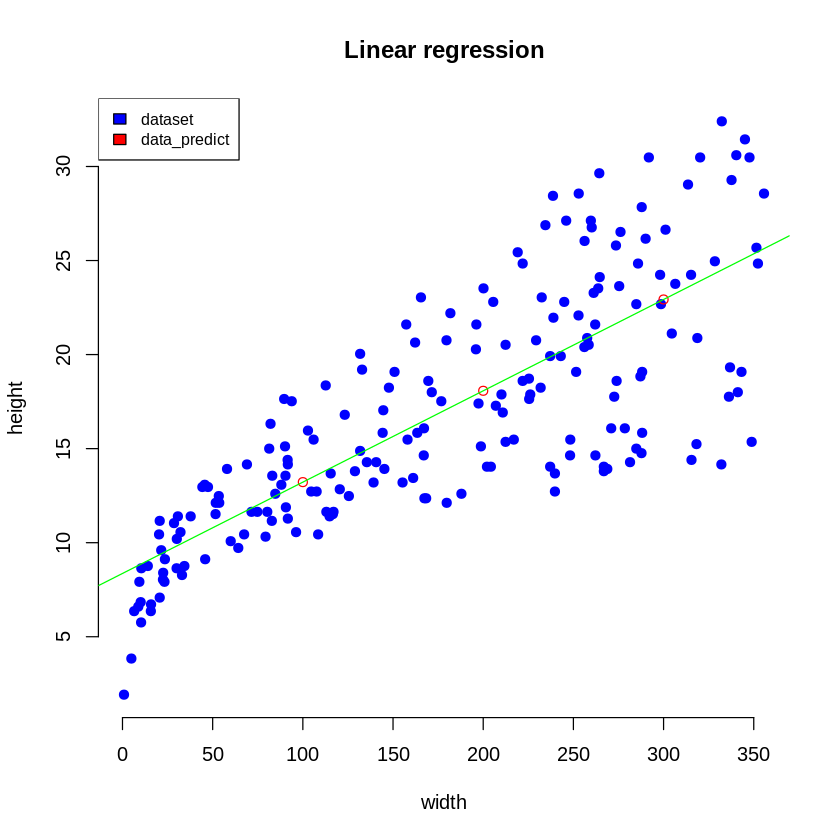

In [26]:
# Visualization : Trực quan hóa kết quả
plot(df$youtube, df$sales,
      main = "Linear regression",
     xlab = "width", 
     ylab = "height",
     pch = 19, 
     frame = FALSE, 
     col= 'blue')

lines(x, y, col= 'red', type='p')
abline(lmMod, iris, col = "green")
legend("topleft", 
       c("dataset", "data_predict"), 
       cex=0.8, 
       fill = c("blue", "red"))


In [27]:
# save model
saveRDS(lmMod, "lmMod.rds")

In [28]:
# load model
lmMod_load = readRDS("lmMod.rds")

In [29]:
# new predict
y2 = predict(lmMod_load, data.frame(youtube = x))
print("result: ")
print(y2)

[1] "result: "
       1        2        3 
13.21985 18.07484 22.92984 


### Multi linear regression

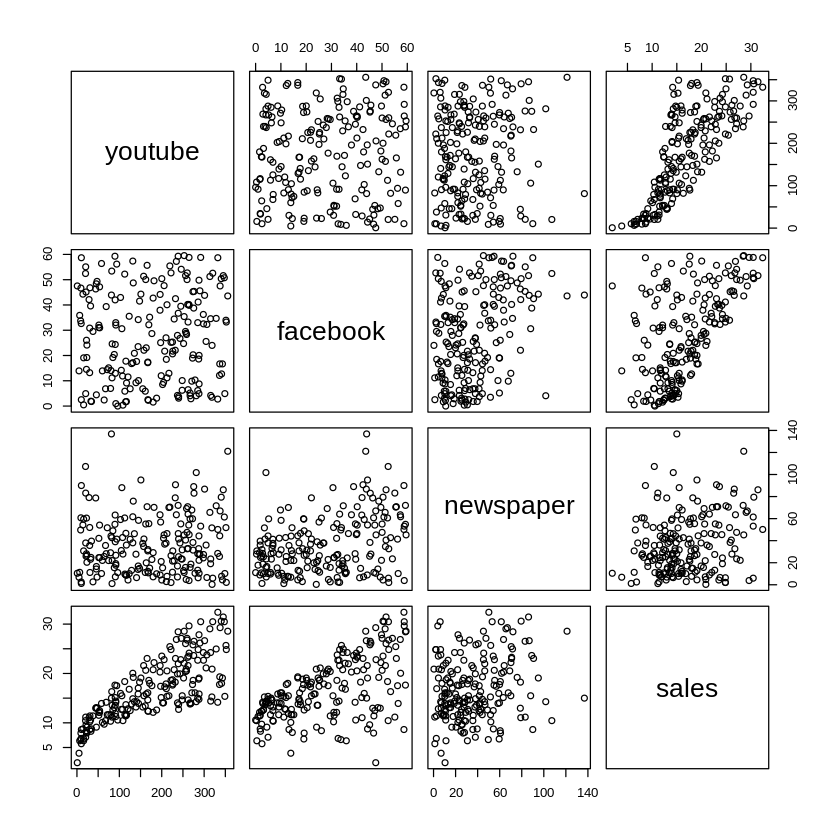

In [48]:
pairs(~., data=df)

In [34]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’




In [35]:
library("GGally")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



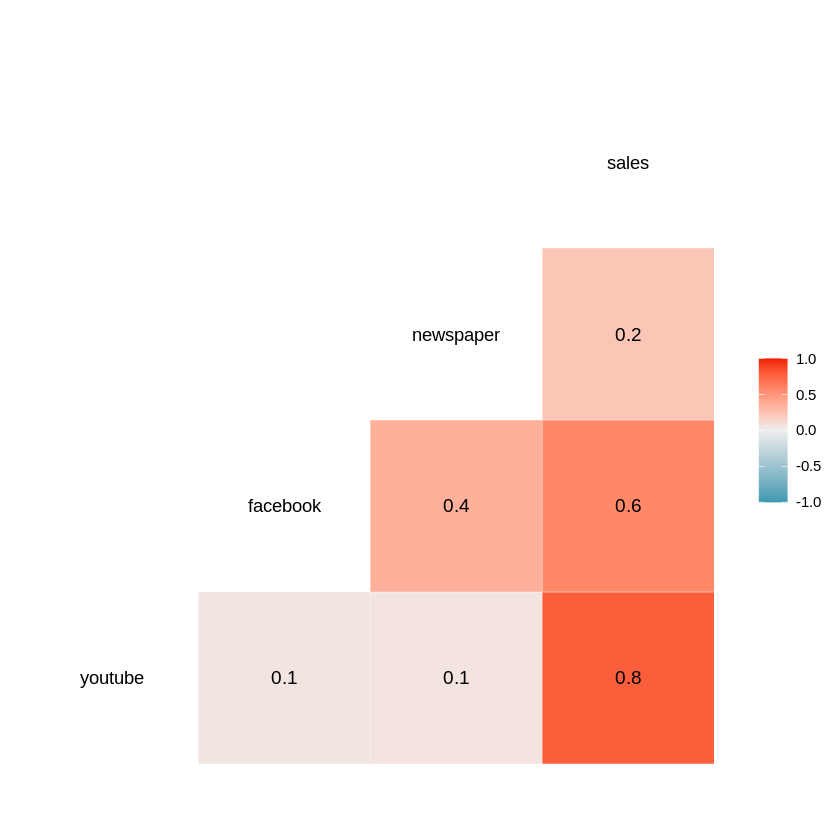

In [50]:
ggcorr(data=df, label = "T")

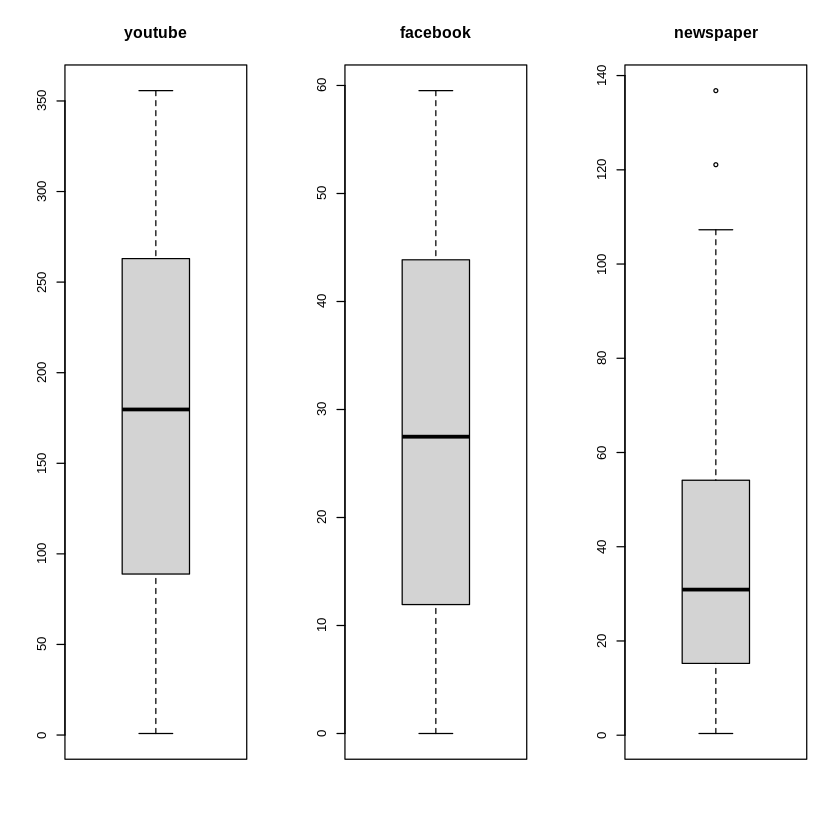

In [51]:
# boxplot
par(mfrow = c(1,3))
boxplot(df$youtube, main = "youtube")
boxplot(df$facebook, main = "facebook")
boxplot(df$newspaper, main= "newspaper")

In [52]:
print(boxplot.stats(df$youtube)$out)
print(boxplot.stats(df$facebook)$out)
print(boxplot.stats(df$newspaper)$out)

numeric(0)
numeric(0)
[1] 136.80 121.08


In [53]:
# newspaper co 2 outliers

In [54]:
newspaper_outliers = boxplot.stats(df$newspaper)$out
print("newspaper outliers: ")
print(newspaper_outliers)
print(paste("Numrows: ", sum(df$newspaper == newspaper_outliers)))

[1] "newspaper outliers: "
[1] 136.80 121.08
[1] "Numrows:  2"


In [55]:
print(paste("before drop: ", nrow(df)))

[1] "before drop:  200"


In [56]:
df = df[!(df$newspaper %in% newspaper_outliers), ]

In [57]:
print(paste("After drop: ", nrow(df)))

[1] "After drop:  198"


In [59]:
# Create the training (development) and test (validation) data samples from original data.
set.seed(13) 
# setting seed to reproduce results of random sampling 
trainingRowIndex <- sample (1: nrow(df), 0.8*nrow(df)) # row indices for training data
print("Selected training row indexes: ") 
print(trainingRowIndex)
trainingData <- df[trainingRowIndex, ] # training data 
testData <- df[-trainingRowIndex, ] # test data 
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))

[1] "Selected training row indexes: "
  [1]   3 192 101  74   6 176 150 132  64  81 128 106 143  55  23   5 140  49
 [19]  54  32 179 125  47 189 181  11  68 120  87  78  61 117 131 166 172  66
 [37] 129  62  51 127 115 118  60 174  76  42 161 119  15 113  14 121  31 177
 [55] 169 156  77 162 105  97  48 124 193 182  84  17  53   7  73  91 180 141
 [73]  90  46   9  36 198 196 183  57 157  67 139  70 155   8 186 152 153   1
 [91] 145  40  20  72  28  25  59 151  58  99  94  26  13  37  86 142 163 191
[109] 146 111 178 130  89 185  92  22 136  21  52   2 137  35  39  82 168 135
[127] 187  16 108  95  85  45  93 194 171 190 112 100 102 149  12 103  98 114
[145] 173 188 148 197 158 144 138  24  19  10  30  18 126 165
[1] "Rows of training data and test data:"
[1] 158
[1] 40


In [61]:
# build model
lmMod <- lm(sales ~ youtube + facebook + newspaper, data=trainingData) # build model
cPred <- predict(lmMod, testData) # predict length
# mean square error according to model
mse <- mean(lmMod$residuals^2) 
print(paste("mse: ", mse))
# mean square error of testData
mse_test = mean((testData$sales - cPred)^2) 
print(paste("mse in test: ", mse_test))

[1] "mse:  4.29586235626415"
[1] "mse in test:  3.15617124184558"


In [62]:
summary(lmMod)


Call:
lm(formula = sales ~ youtube + facebook + newspaper, data = trainingData)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5865  -0.8042   0.3385   1.4079   3.3279 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.382102   0.438603   7.711 1.44e-12 ***
youtube     0.045407   0.001625  27.945  < 2e-16 ***
facebook    0.190382   0.010167  18.725  < 2e-16 ***
newspaper   0.003762   0.007719   0.487    0.627    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.099 on 154 degrees of freedom
Multiple R-squared:  0.8944,	Adjusted R-squared:  0.8923 
F-statistic: 434.6 on 3 and 154 DF,  p-value: < 2.2e-16


In [63]:
b = coef(lmMod)[1]
b

(Intercept) 
   3.382102

In [66]:
data.frame(coef(lmMod))

,coef.lmMod.
,<dbl>
(Intercept),3.382102180
youtube,0.045406762
facebook,0.190382409
newspaper,0.003761724
